In [1]:
# construct one section hemisphere data from one section data
import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import scanpy as sc
import seaborn as sns

#from txtox.compute import construct_graph
from txtox.utils import get_paths

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format="retina"

In [2]:
# full_brain.h5ad was generated with notebooks in abcex
path = get_paths()["data_root"] + "full_brain.h5ad"
adata = ad.read_h5ad(path, backed="r")

/allen/programs/celltypes/workgroups/mousecelltypes/Rohan/env/miniconda3/envs/txtox-gpu/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [3]:
print(adata.obs.columns)
#display(adata.obs["brain_section_label"].value_counts().to_frame())

Index(['cell_label', 'brain_section_label', 'cluster_alias',
       'average_correlation_score', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'x_section', 'y_section', 'z_section',
       'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster',
       'neurotransmitter_color', 'class_color', 'subclass_color',
       'supertype_color', 'cluster_color', 'x_reconstructed',
       'y_reconstructed', 'z_reconstructed', 'parcellation_index', 'x_ccf',
       'y_ccf', 'z_ccf', 'parcellation_organ', 'parcellation_category',
       'parcellation_division', 'parcellation_structure',
       'parcellation_substructure', 'parcellation_organ_color',
       'parcellation_category_color', 'parcellation_division_color',
       'parcellation_structure_color', 'parcellation_substructure_color'],
      dtype='object')


In [4]:
adata.obs[["brain_section_label", "z_section"]].drop_duplicates().sort_values(by="z_section").reset_index(drop=True)

,brain_section_label,z_section
0,C57BL6J-638850.05,0.8
1,C57BL6J-638850.06,1.0
2,C57BL6J-638850.08,1.4
3,C57BL6J-638850.09,1.6
4,C57BL6J-638850.10,1.8
5,C57BL6J-638850.11,2.0
6,C57BL6J-638850.12,2.2
7,C57BL6J-638850.13,2.4
8,C57BL6J-638850.14,2.6
9,C57BL6J-638850.15,2.8


In [5]:
# adata.obs["z_section"].unique().shape
# adata.obs.head(2)

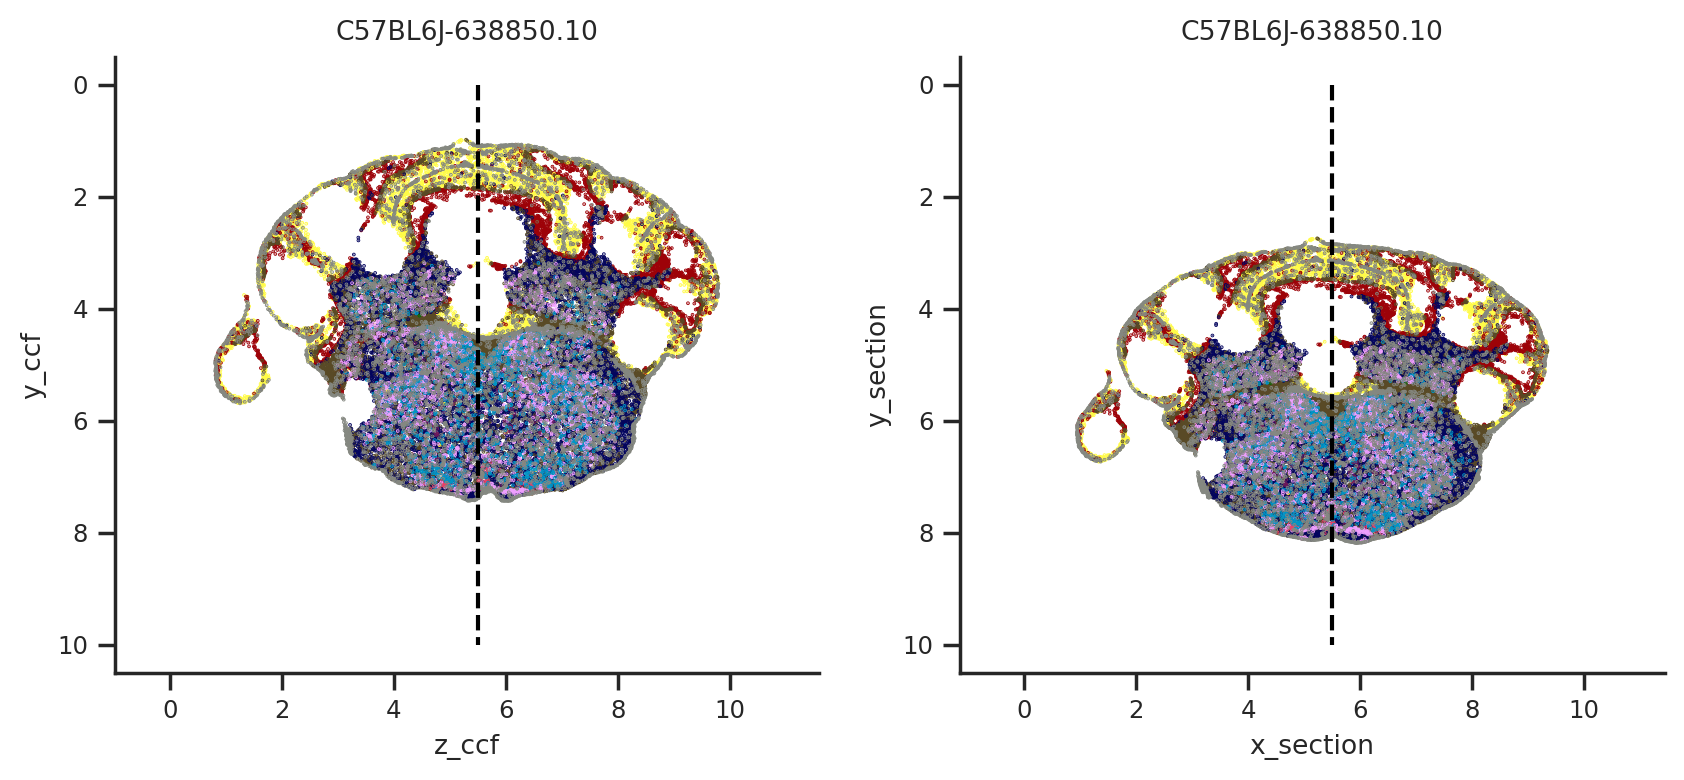

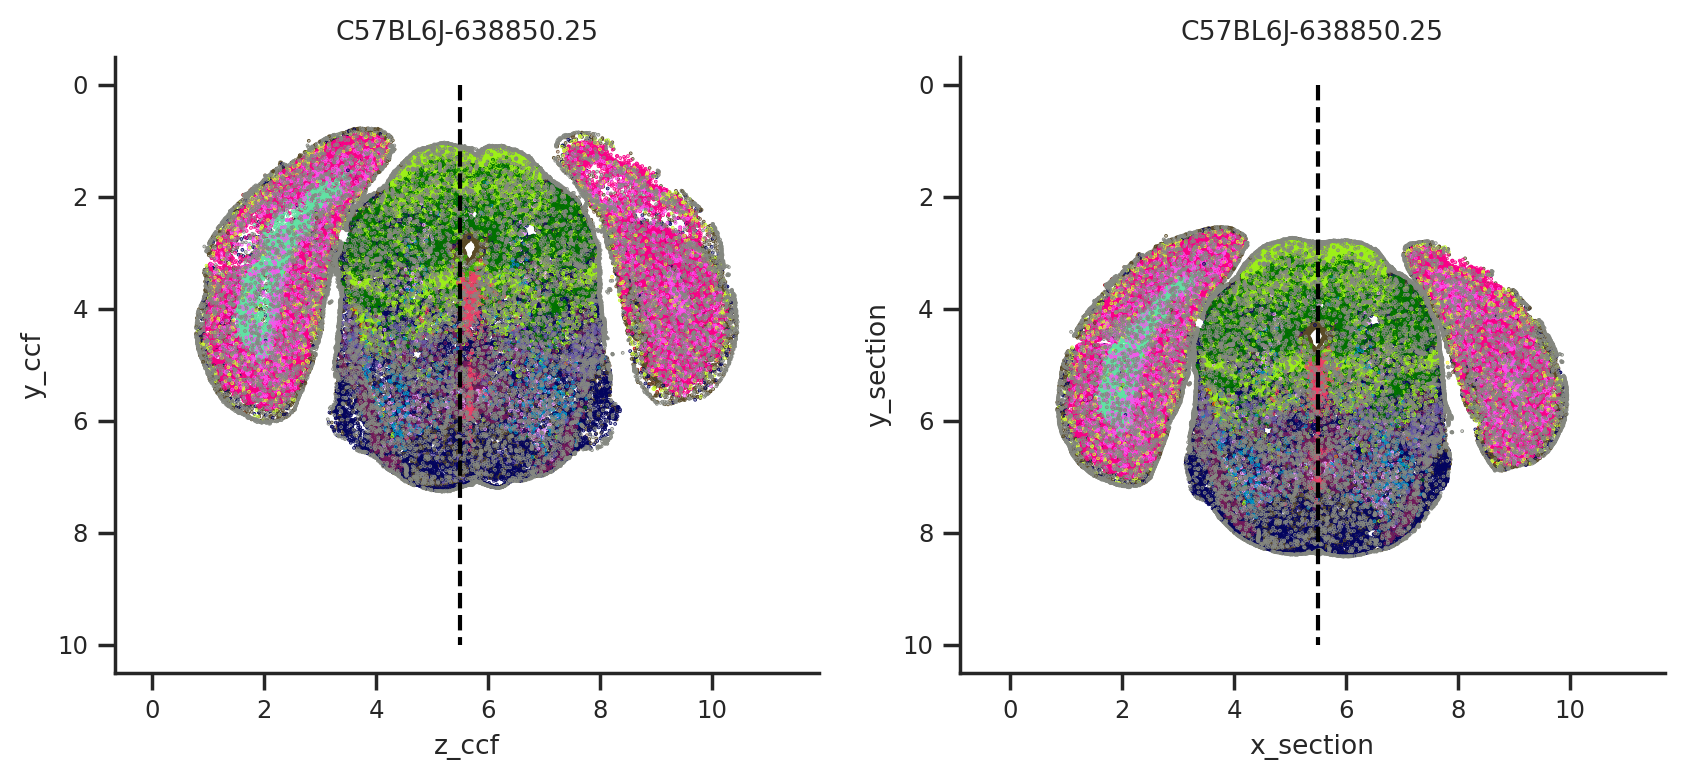

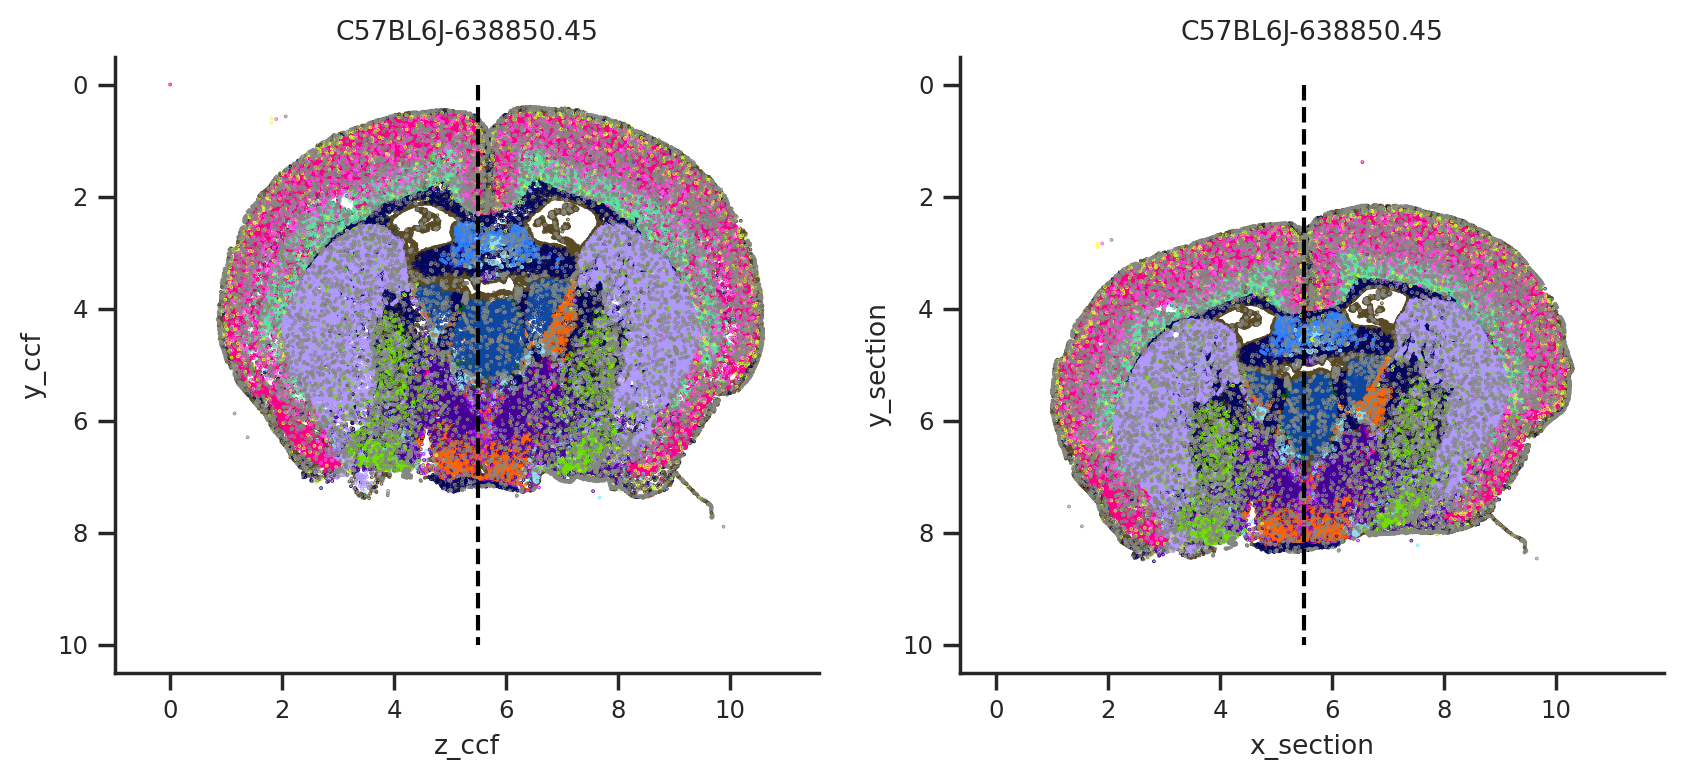

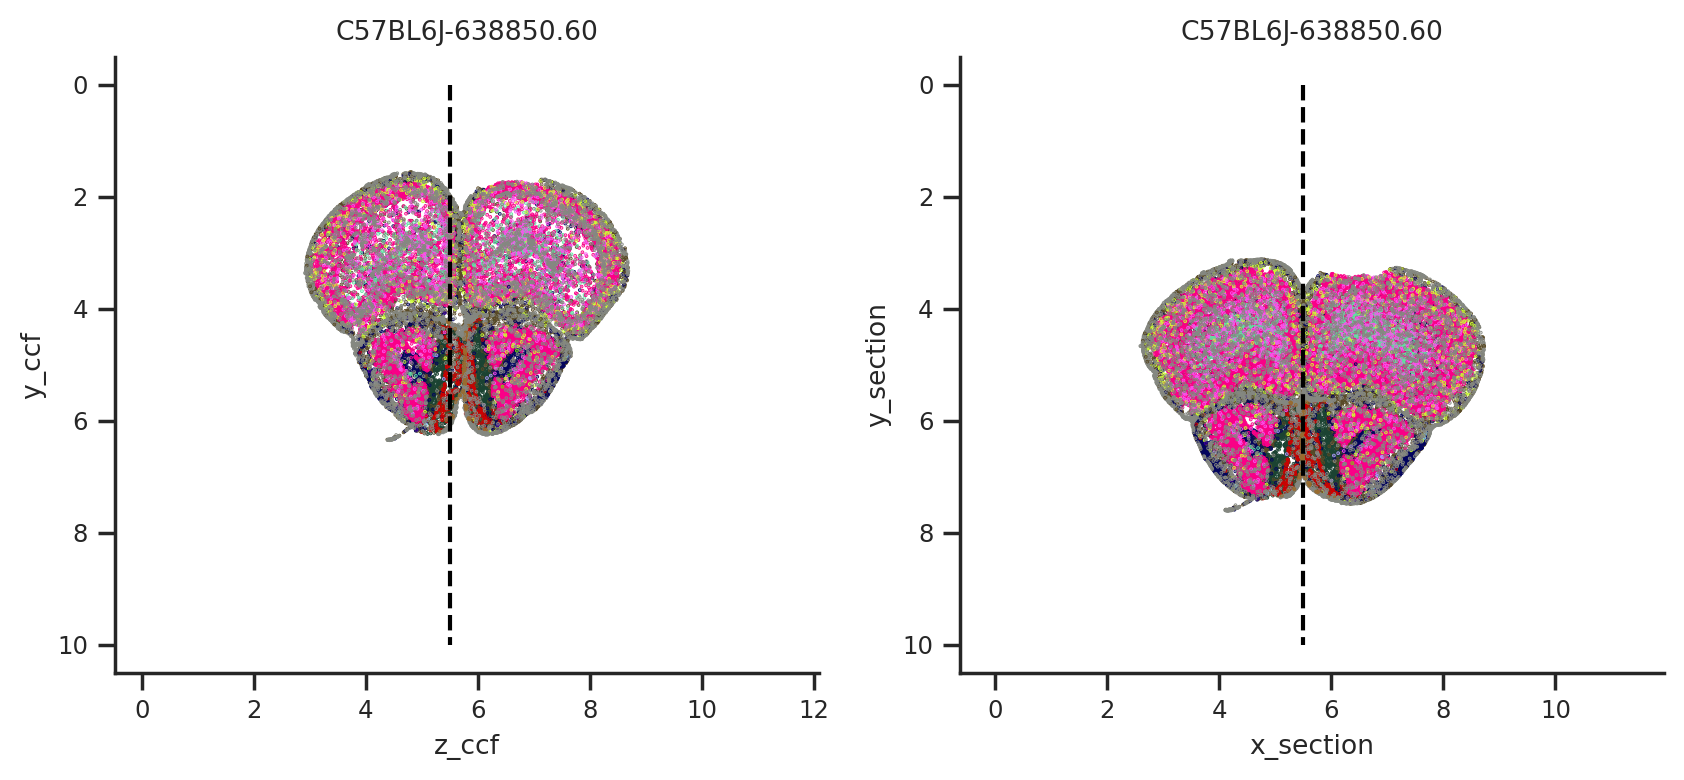

In [6]:
for this_section in ["10", "25", "45", "60"]:
    this_section = "C57BL6J-638850." + this_section
    f, ax = plt.subplots(1,2,figsize=(10, 4))
    ax[0].scatter(adata.obs.loc[adata.obs["brain_section_label"]==this_section, "z_ccf"],
                adata.obs.loc[adata.obs["brain_section_label"]==this_section, "y_ccf"],
                c=adata.obs.loc[adata.obs["brain_section_label"]==this_section, "class_color"], s=0.1)
    ax[0].vlines(5.5, 0, 10, color="black", linestyle="--")
    ax[0].set(xlabel="z_ccf", ylabel="y_ccf")

    ax[1].scatter(adata.obs.loc[adata.obs["brain_section_label"]==this_section, "x_section"],
                adata.obs.loc[adata.obs["brain_section_label"]==this_section, "y_section"],
                c=adata.obs.loc[adata.obs["brain_section_label"]==this_section, "class_color"], s=0.1)
    ax[1].vlines(5.5, 0, 10, color="black", linestyle="--")
    ax[1].set(xlabel="x_section", ylabel="y_section")

    for ax_ in ax:
        ax_.set(xlim=(0, 10), ylim=(0, 10), title=this_section)
        ax_.axis("equal")
        ax_.invert_yaxis()
    plt.show()

In [7]:
# only keep adata that has x_section<5.5
adata = adata[adata.obs["x_section"] < 5.5]
adata = adata.to_memory().copy()

In [8]:
from sklearn.neighbors import KNeighborsTransformer

adata.obsm["spatial"] = adata.obs[["x_section", "y_section", "z_section"]].values
sc.pp.neighbors(
    adata,
    n_neighbors=15,
    n_pcs=None,
    use_rep="spatial",
    knn=True,
    transformer=KNeighborsTransformer(n_neighbors=15, metric="minkowski", p=2),
    key_added="spatial",
    copy=False,
)

In [9]:
adata

AnnData object with n_obs × n_vars = 1851278 × 550
    obs: 'cell_label', 'brain_section_label', 'cluster_alias', 'average_correlation_score', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'x_section', 'y_section', 'z_section', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'x_reconstructed', 'y_reconstructed', 'z_reconstructed', 'parcellation_index', 'x_ccf', 'y_ccf', 'z_ccf', 'parcellation_organ', 'parcellation_category', 'parcellation_division', 'parcellation_structure', 'parcellation_substructure', 'parcellation_organ_color', 'parcellation_category_color', 'parcellation_division_color', 'parcellation_structure_color', 'parcellation_substructure_color'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'accessed_on', 'src', 'spatial'
    obsm: 'spatial'
    obsp: 'spatial_distances', 'spatial_connectivities'

In [10]:
# calculate median value of x_section and y_section 
median_x_section = adata.obs["x_section"].median()
median_y_section = adata.obs["y_section"].median()

# subtract median value of x_section and y_section from x_section and y_section
adata.obs["x_section"] = adata.obs["x_section"] - median_x_section
adata.obs["y_section"] = adata.obs["y_section"] - median_y_section

print(f"median_x_section: {median_x_section}, median_y_section: {median_y_section}")
print("Units otherwise are in mm")

median_x_section: 3.784969537966126, median_y_section: 5.361673779391445
Units otherwise are in mm


In [11]:
# get number of unique 'class', 'subclass', 'supertype', 'cluster'
print(f"Number of unique 'class': {adata.obs['class'].nunique()}")
print(f"Number of unique 'subclass': {adata.obs['subclass'].nunique()}")
print(f"Number of unique 'supertype': {adata.obs['supertype'].nunique()}")
print(f"Number of unique 'cluster': {adata.obs['cluster'].nunique()}")

Number of unique 'class': 34
Number of unique 'subclass': 335
Number of unique 'supertype': 1194
Number of unique 'cluster': 5211


In [12]:
# save dataset
path = get_paths()["data_root"] + "test_wb_hemi_v1.h5ad"
adata.write_h5ad(path)